### Decision Trees Memorization
I was looking how Decision Trees performs inference and I found the equations on 18.1, 18.2, and 18.3

$R_1 = \{ \textbf{x} : x_1 \le t_1 , x_2 \le t_2 \} \quad \text{(18.1)}$ 

$w_1 = \frac{\sum^{N}_{n = 1} y_n \mathbb{I}(\textbf{x}_n \in R_1)}{\sum^{N}_{n = 1} \mathbb{I}(\textbf{x}_n \in R_1)} \quad \text{(18.2)}$

$f(\textbf{x}; \theta) = \sum^{J}_{j = 1} w_j \mathbb{I}(\textbf{x} \in R_j)$

**Where:**

$J:$ Total Leaves in the node of a Decision Tree

### Observation
If my understanding is correct, CART (Classification and Regression Trees) won't provide you a continuous regression, but rather a discrete one. This also gives an impression that Decision Tree will just memorize regression values from the Training Set. 

### Steps to Verify Understanding
- Generate a Toy Dataset where the input data is the value of $cos(\theta)$. We will try to predict the angle $\theta$
- Split the Data by odd and even indices. 
- Set odd data as train, and even data as test. Also do the converse.
- Plot the prediction.

#### Expected Results

If my understanding of 18.1, 18.2, and 18.3 were correct, then the following result should appear:
- Since train/test data are nearby to each other, then their result should be the same, if CART really memorizes the results.
- The prediction values would be limited to the total number of leaves of CARTs. Therefore, it must be discrete.

n_sample =  32


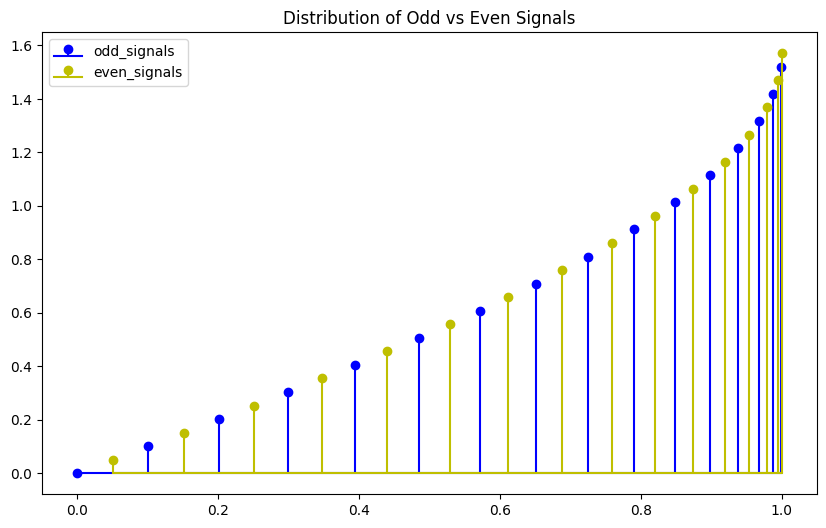

In [62]:
import matplotlib.pyplot as plt
import numpy as np

plt_figsize = (10,6)
n_sample = 2**5
print('n_sample = ', n_sample)
theta = np.linspace(0, np.pi / 2, num=n_sample)
xs = np.sin(theta)

theta_odd = theta[0::2]
x_odd = xs[0::2]

theta_even = theta[1::2]
x_even = xs[1::2]


plt.figure(figsize=plt_figsize)
plt.stem(x_odd, theta_odd, linefmt='b-', basefmt='b-', label='odd_signals')
plt.stem(x_even, theta_even, linefmt='y-', basefmt='y-', label='even_signals')
plt.legend()

plt.title('Distribution of Odd vs Even Signals')
plt.show()



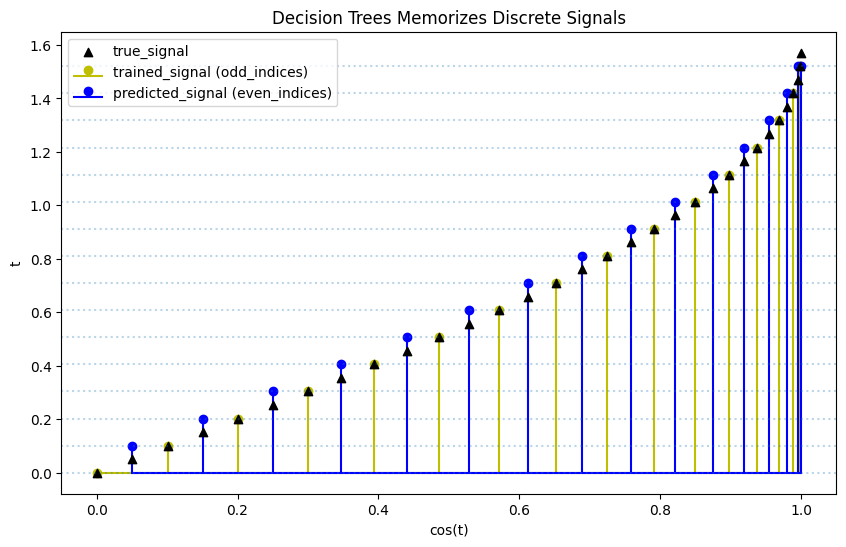

In [63]:
from sklearn.tree import DecisionTreeRegressor

def train_plot_decision_tree(x, x_train, x_test, y, y_train, train_label, test_label):
    tree_model = DecisionTreeRegressor()

    tree_model.fit(x_train.reshape(-1,1), y_train)
    y_pred = tree_model.predict(x_test.reshape(-1,1))

    plt.figure(figsize=plt_figsize)
    plt.stem(x_train, y_train, linefmt='y-', basefmt='y-', label=f'trained_signal ({train_label})')
    plt.stem(x_test, y_pred, linefmt='b-', basefmt='b-', label=f'predicted_signal ({test_label})')
    plt.scatter(x, y, color='black', label='true_signal', marker='^', zorder=2)
    plt.legend()

    for i in range(0, y_pred.shape[0]):
        plt.axhline(y_train[i], linestyle='dotted', alpha=0.3)

    plt.title('Decision Trees Memorizes Discrete Signals')
    plt.xlabel('cos(t)')
    plt.ylabel('t')
    plt.show()


train_plot_decision_tree(xs, x_odd, x_even, theta, theta_odd, 'odd_indices', 'even_indices')


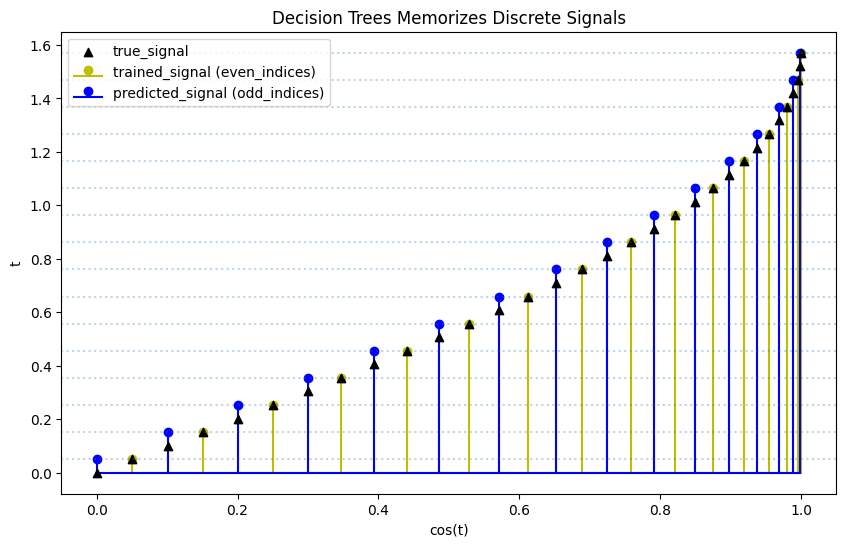

In [64]:
train_plot_decision_tree(xs, x_even, x_odd, theta, theta_even, 'even_indices', 'odd_indices')

### Another Consequence of Memorization 
- Since it just memorizes, it's regression prediction will be upper-bounded on the highest value it memorized from the training set. This is clearly demonstrated on the next code.

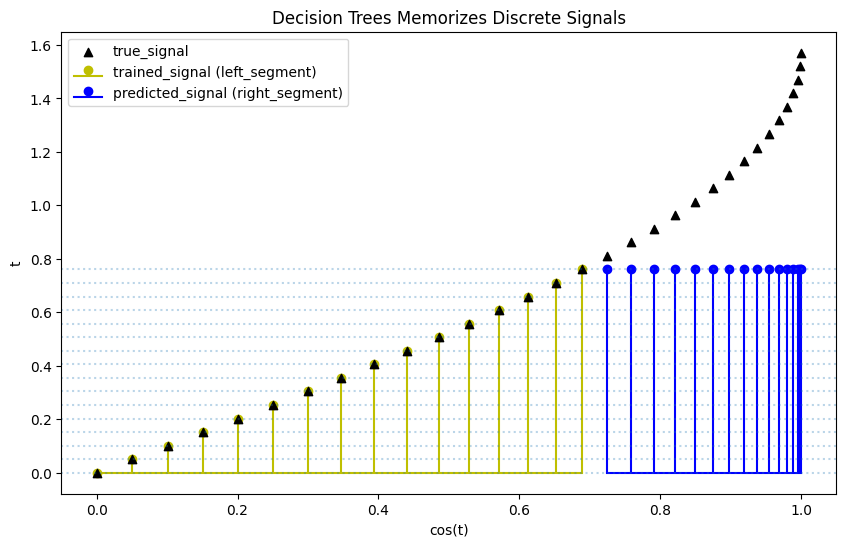

In [66]:
x_left = xs[0:xs.shape[0] // 2]
theta_left = theta[0:theta.shape[0] // 2]

x_right = xs[xs.shape[0] // 2 : ]
theta_right = theta[theta.shape[0] // 2: ]

# Let's just train our data on the left segment of the dataset
train_plot_decision_tree(xs, x_left, x_right, theta, theta_left, 'left_segment', 'right_segment')

### Conclusion
- Decision Trees clearly memorizes its learned regression values by storing them as discrete values within their leaves.